# **E-COMMERCE COSTUMER CHURN**

## 1. Business Problem Understanding

### **Context**

E-commerce, short for electronic commerce, is an exchange activity of goods and services, where the transactions take place over the internet between businesses, consumers, or both. In industry, e-commerce has become one of the fastest-growing and most competitive markets in recent years. Companies compete not only by offering a wide variety of products and attractive prices, but also by delivering smooth customer experiences and building long-term loyalty.

In such a highly competitive landscape, one of the biggest challenges e-commerce companies face is customer churn. Costumer churn is a phenomenon where existing costumers stop doing business with a company over a certain period.
> Then what impact does **costumer churn** have on the companies? 

Attracting new customers is important, but retaining existing ones is even more critical to sustainable growth. High churn rates can quickly cancel out the benefits of customer acquisition, weaken revenue streams, and slow down business expansion. To stay ahead, companies must invest in strategies that enhance customer satisfaction, personalize the shopping journey, and foster long-term engagement.

However, sustaining this engagement is not always easy, as churn often occurs when customers become inactive, reduce their purchase frequency, or stop perceiving value in the platform. In e-commerce, churn is more than just a number, it represents lost relationships, missed revenue opportunities, and a shrinking loyal customer base. If left unmanaged, churn can silently erode business growth even when new customers are continuously acquired.

Therefore, predicting churn is crucial because it allows companies to act before customers actually leave. Without prediction, businesses can only react once churn has already occurred, resulting in lost revenue and higher acquisition costs to replace those customers. By forecasting which customers are at risk, companies gain the opportunity to intervene early with targeted promotions, personalized offers, or loyalty programs. This proactive approach not only reduces overall churn rates but also optimizes marketing spend, strengthens long-term customer relationships, and ensures more sustainable revenue growth.

### **Sense of Urgency**

To understand why churn prediction is financially important, we can look at two key metrics:
Customer Acquisition Cost (CAC) and Customer Retention Cost (CRC).

> **Customer Acquisition Cost (CAC)**

Formula:
$$ CAC = \frac{\text{Total Marketing \& Sales Cost}}{\text{Number of New Customers Acquired}} $$
Example (in case):
An e-commerce company spends $50,000 on marketing campaigns and gains 1,000 new customers.
$$ CAC = \frac{50,000}{1,000} = \$50 $$
This means the company spends $50 to acquire one new customer.

> **Customer Retention Cost (CRC)**

Formula:
$$ CRC = \frac{\text{Total Retention Program Cost}}{\text{Number of Customers Retained}} $$

Example (in case):
The same company invests $15,000 in loyalty programs and personalized offers that successfully retain 1,000 existing customers.
$$ CRC = \frac{15,000}{1,000} = \$15 $$
So, it only costs $15 to retain one customer, which is three times cheaper than acquiring a new one.

> **Why This Matters?**

When customers churn, the company must spend another $50 to replace each one — instead of spending $15 to keep them.
For example, if 200 customers churn, the company must spend:
$$ 200 \times \$50 = \$10,000 $$
to replace them.
But if those 200 customers could have been retained using personalized offers costing only:
$$ 200 \times \$15 = \$3,000 $$
The business would save $7,000 in marketing and acquisition costs.



This simple comparison shows that reducing churn directly increases profit margins.
By using a churn prediction model, the company can identify customers who are likely to leave and focus its $15 retention effort on those at risk, instead of spending $50 to acquire replacements later.
Over time, this approach:
- Lowers total marketing and sales expenses
- Improves Customer Lifetime Value (CLV)
- Builds a stronger, more loyal customer base

### **Problem Statement**

Given this challenge, the key problem is that companies often lack the ability to anticipate churn before it happens. Current approaches are largely reactive, meaning actions are taken only after customers have already disengaged. This limits the effectiveness of retention strategies and leads to unnecessary revenue loss and higher acquisition costs. What is needed is a proactive way to identify at-risk customers in advance. 

To move toward such a solution, several important questions need to be addressed:
- Which behaviors and transaction patterns indicate that a customer is about to churn?
- How can machine learning models be applied to predict churn reliably and at scale?
- How can the predictions be turned into actionable steps, such as targeted retention campaigns, to reduce churn effectively?

### **Goals**

Based on the key questions, the goals are:
- Identify patterns of customer behavior and transactions that serve as early indicators of potential churn.
- Develop and apply machine learning models capable of predicting customer churn with reliability and scalability.
- Translate model predictions into actionable business strategies, such as personalized offers, targeted promotions, or loyalty programs, to reduce churn and strengthen long-term customer relationships.

### **Evaluation Metrics**

By the stated goals, predicting costumers that are more likely to churn is more important than costumers who are going to stay. This make the churn costumers as positive class and non-churn costumers as a negative class.


**Class categorization**
>- **Churn** : positive class
>- **Not Churn** : negative class 

From the categorization above, it becomes clear that the priority is to focus on reducing False Negatives in the model predictions which is when the costumers are predicted not to churn but in reality, they do. It is more acceptable to incorrectly predict that a customer will churn when they actually won’t, since this only leads to additional retention efforts, rather than losing customers who were truly at risk.

However, the model can also make False Positive (FP) errors, predicting a customer will churn when they actually won’t.
While this increases the number of customers flagged as “at risk,” the impact of a False Positive is less severe. It might result in unnecessary retention actions (like offering discounts or incentives) to loyal customers, which incurs additional cost, but this cost is far lower than losing actual churners.

In short:
- False Negative (FN): Lost customers and revenue → high business impact
- False Positive (FP): Unnecessary retention effort → moderate cost impact

> #### **Why the F2 Score is Used?**

The F2 score places stronger emphasis on Recall (detecting churners) than on Precision (avoiding false alarms). Recall is considered detecting churners because it measures how many actual churners are correctly identified by the model, missing them means losing real customers who were at risk. Precision is viewed as avoiding false alarms because it reflects how many of the customers predicted to churn actually do, a lower precision means more loyal customers are mistakenly flagged, leading to additional but tolerable retention costs.

The Fβ score combines Precision and Recall, and is defined as:
$$
F_{\beta} = (1 + \beta^2) \times \frac{(\text{Precision} \times \text{Recall})}{(\beta^2 \times \text{Precision}) + \text{Recall}}
$$
When β = 2, Recall is given four times more importance than Precision:
$$
F_{2} = 5 \times \frac{(\text{Precision} \times \text{Recall})}{(4 \times \text{Precision}) + \text{Recall}}
$$
This means optimizing the F₂ Score helps the model capture more real churners, ensuring that fewer at-risk customers are overlooked, even if it results in a few more false positives.
Ultimately, prioritizing Recall through F₂ enables the business to take proactive retention actions and minimize potential revenue loss.

### **Data Understanding**

In [200]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data_ecommerce_customer_churn.csv')

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [202]:
pd.DataFrame({
    'feature': data.columns.values,
    'data_type': data.dtypes.values,
    'null': data.isna().mean().values * 100,
    'n_unique': data.nunique().values
})

,feature,data_type,null,n_unique
0,Tenure,float64,4.922608,36
1,WarehouseToHome,float64,4.288252,33
2,NumberOfDeviceRegistered,int64,0.000000,6
3,PreferedOrderCat,object,0.000000,6
4,SatisfactionScore,int64,0.000000,5
5,MaritalStatus,object,0.000000,3
6,NumberOfAddress,int64,0.000000,14
7,Complain,int64,0.000000,2
8,DaySinceLastOrder,float64,5.404720,22
9,CashbackAmount,float64,0.000000,2335


>**Data Overview**

The dataset contains of 3,941 records and 11 features that represent various customer attributes, behaviors, and the churn outcome. It consists of a mix of numeric and categorical variables, making it suitable for a classification task where the target variable is Churn.

From the summary above, the dataset includes:
- 9 columns with data type numerical
- 2 columns with data type categorical

>**Missing Values**

The missing value analysis reveals that most features are complete, except for a few numeric columns with minor missing percentages:

| Feature | Missing |
| --- | --- |
| Tenure | 4.92% | 
| WarehouseToHome | 4.29% |
| DaySinceLastOrder | 5.40% |

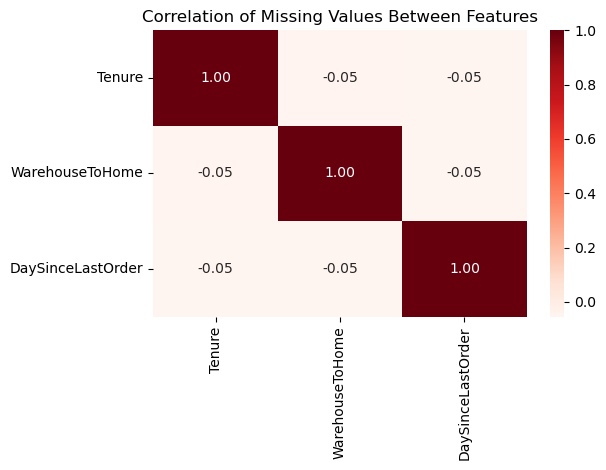

In [203]:
missing_matrix = data[['Tenure','WarehouseToHome','DaySinceLastOrder']].isna().astype(int)
missing_corr = missing_matrix.corr()

sns.heatmap(missing_corr, annot=True, cmap='Reds', fmt=".2f")
plt.title('Correlation of Missing Values Between Features')
plt.tight_layout()
plt.show()

Insights :

The heatmap above visualizes the correlation between missing values across numeric features (Tenure, WarehouseToHome, and DaySinceLastOrder).
Each cell represents how likely it is that missing data in one column occurs together with missing data in another column.

From the heatmap:
- The correlations between all three features are very low (around -0.05).
- This indicates that the missing values occur independently, meaning when one column has missing data, it does not imply that the others are also missing.

The conclusion is there is no strong correlation among the missing values, suggesting that each missing pattern is likely caused by independent factors such as incomplete customer data or irregular user activity. Since the overall proportion of missing data is below 6%, these missing values can be safely handled using median imputation, which helps preserve the feature distribution and minimizes the impact of outliers.

> **Target Variable**

The target column Churn is binary with two unique values:
- 1 → Customer churned (stopped using the platform)
- 0 → Customer retained (still active)

>**Data Distribution**

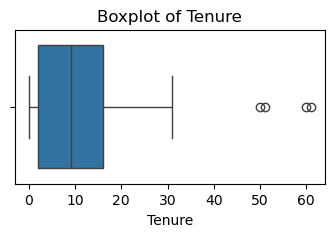

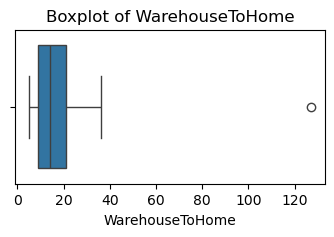

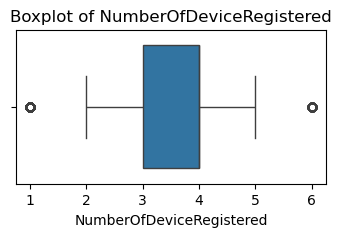

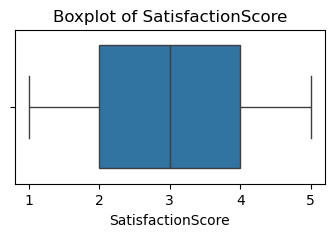

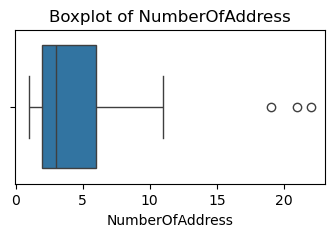

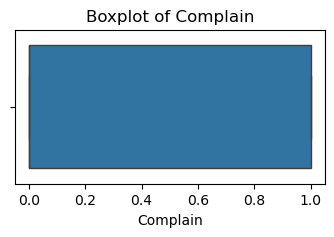

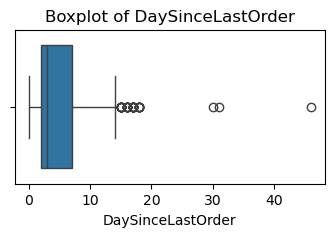

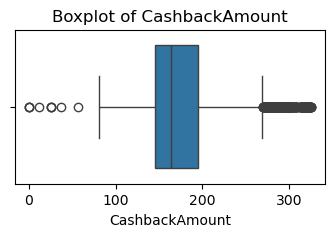

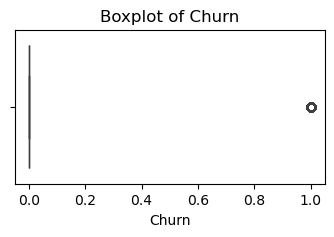

In [204]:
data_num = data.drop(['PreferedOrderCat', 'MaritalStatus'], axis=1)

for col in data_num.columns:
    plt.figure(figsize=(4,2))
    sns.boxplot(x=data_num[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [205]:
data.columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount',
       'Churn'],
      dtype='object')

Insight :

- Most numeric features show right-skewed distributions with clear outliers, making RobustScaler the best choice.
- Both categorical features are nominal — their categories have no intrinsic order (e.g., “Electronics” ≠ “Clothing” > “Beauty”). Hence, OneHotEncoding is the most appropriate approach to avoid introducing false ordinal relationships.

Summary of Preprocessing Strategy :

The dataset’s numeric features exhibit mild to strong skewness and several outliers, while categorical variables are nominal.
Therefore, applying RobustScaler to numeric data and OneHotEncoder to categorical data ensures balanced scaling and accurate categorical representation before feeding the data into the machine learning model.
| Type | Features | Method |
|---|---|---|
| Categorical | PreferedOrderCat, MaritalStatus | OneHotEncoder |
| Numeric | WarehouseToHome, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, NumberOfAddress, Complain, DaySinceLastOrder, CashbackAmount, Churn | RobustScaler|

>**Churn Distribution**

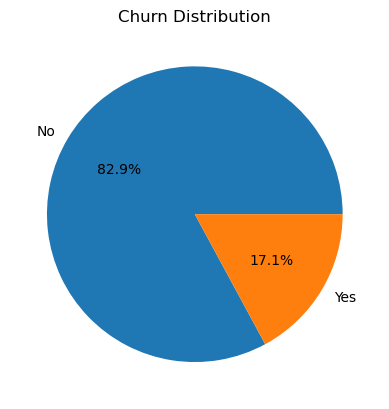

In [206]:
churn = data['Churn'].value_counts().reset_index()
label = ['No', 'Yes']

plt.title('Churn Distribution')
plt.pie(churn['count'], labels=label, autopct='%1.1f%%')
plt.show()

Insights:

The pie chart above illustrates the distribution of the target variable, Churn, which represents whether a customer has stopped using the platform (Yes) or remains active (No).
From the visualization:
- Non-churned customers (No): 82.9% of the dataset
- Churned customers (Yes): 17.1% of the dataset

This indicates a significant class imbalance, where the number of customers who did not churn far exceeds those who did. To prevent model bias and improve minority class detection, imbalanced learning techniques such as **SMOTE** or **Random Under-Sampling** will be applied prior to training.

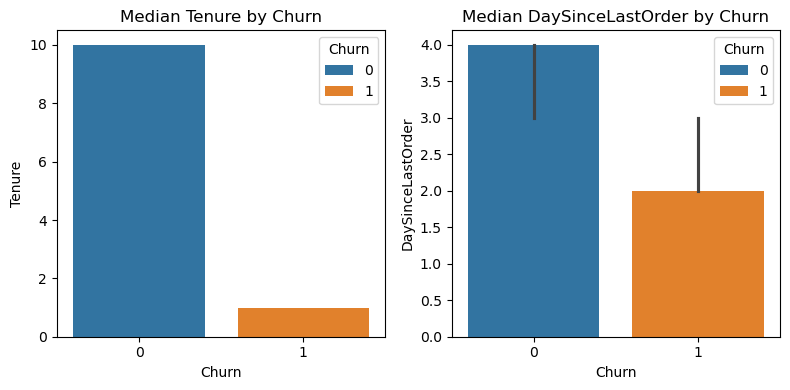

In [207]:
cols = data_num[['Tenure', 'DaySinceLastOrder']]
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

for col, j in zip(cols, axes.flatten()):
    ax = sns.barplot(data=data, y= col, x='Churn', estimator=np.median, ax= j, hue='Churn')
    ax.set_title(f'Median {col} by Churn') 

plt.tight_layout()
plt.show()

Insights:

- Tenure: Churned customers have a much lower median tenure, indicating they usually leave the platform during the early stages of their customer lifecycle. This suggests that new customers are more vulnerable to churn if they are not engaged early.

- DaySinceLastOrder: Churned customers have a lower median value for days since last order, meaning they stopped purchasing earlier compared to retained customers. This reflects inactivity or disengagement that typically occurs before churn.

These patterns show that early engagement and consistent activity are crucial in preventing churn. Customers who don’t stay long or reduce their purchase frequency are at the highest risk of leaving.

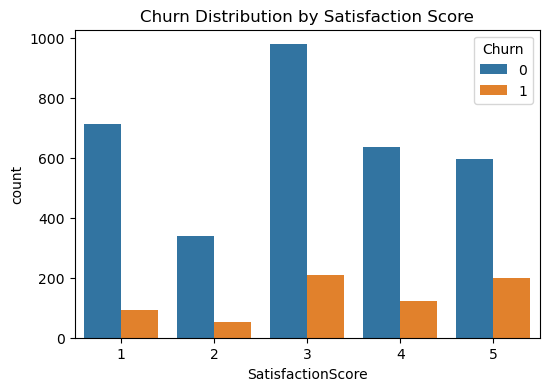

In [208]:
plt.figure(figsize=(6,4))
sns.countplot(x='SatisfactionScore', hue='Churn', data=data)
plt.title("Churn Distribution by Satisfaction Score")
plt.show()

Insights:

The chart shows that churn occurs across all satisfaction levels, and customers with lower satisfaction scores do not necessarily show a higher churn rate. In fact, churn appears relatively balanced among different satisfaction groups, indicating that satisfaction score alone does not strongly influence churn behavior. Other factors, such as delivery experience, complaint frequency, or cashback incentives, may have a greater impact on customer retention.

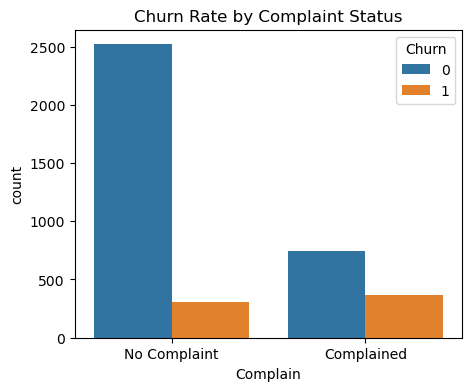

In [209]:
plt.figure(figsize=(5,4))
sns.countplot(x='Complain', hue='Churn', data=data)
plt.title("Churn Rate by Complaint Status")
plt.xticks([0,1], ['No Complaint','Complained'])
plt.show()


Insights :

- Customers who have filed complaints show a higher churn rate compared to those who have never complained, this indicates that negative experiences or unresolved issues can significantly contribute to customers leaving the platform.

- On the other hand, customers who did not file any complaints tend to have higher retention, suggesting a smoother and more satisfying user experience.


<Figure size 800x400 with 0 Axes>

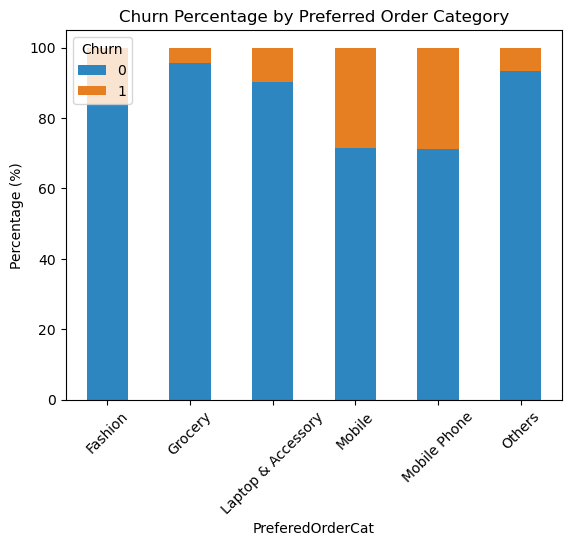

In [210]:
plt.figure(figsize=(8,4))
churn_by_category = pd.crosstab(data['PreferedOrderCat'], data['Churn'], normalize='index') * 100
churn_by_category.plot(kind='bar', stacked=True, color=['#2E86C1', '#E67E22'])
plt.title("Churn Percentage by Preferred Order Category")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.show()

Insights:

- The churn rate varies across product categories, showing that customer loyalty differs depending on their preferred shopping segment.

- Mobile and Mobile Phone categories have the highest churn percentages, which could be because customers in these categories often make one-time or infrequent purchases. For example, buying a new device and then not returning until their next upgrade cycle.

- In contrast, categories like Grocery, Laptop & Accessory, and Fashion show lower churn rates, since they typically involve more frequent or repeat purchases, keeping customers engaged with the platform.

- This suggests that product type and purchase frequency strongly influence churn behavior, and that encouraging repeat engagement through add-on offers or accessories could help retain customers in the high-churn segments.

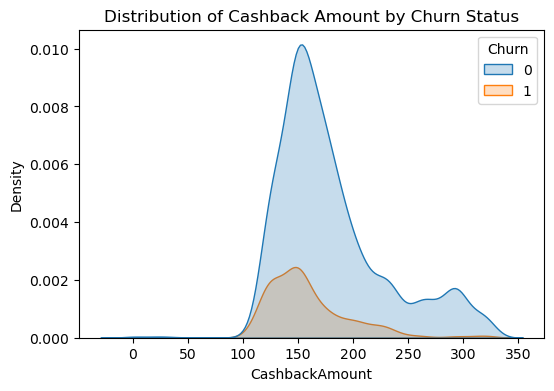

In [211]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=data, x='CashbackAmount', hue='Churn', fill=True)
plt.title("Distribution of Cashback Amount by Churn Status")
plt.show()

Insights:

The plot shows that non-churned customers (Churn = 0) generally receive higher cashback amounts, centered around 150–250, while churned customers (Churn = 1) tend to receive lower cashback values, concentrated around 100–150.

This suggests that cashback incentives may play an important role in customer retention — customers who receive higher cashback amounts are more likely to stay loyal to the platform. Conversely, lower cashback might reduce purchase motivation, especially for price-sensitive users.

In other words, offering more competitive cashback or loyalty rewards could potentially reduce churn rates and strengthen repeat engagement.

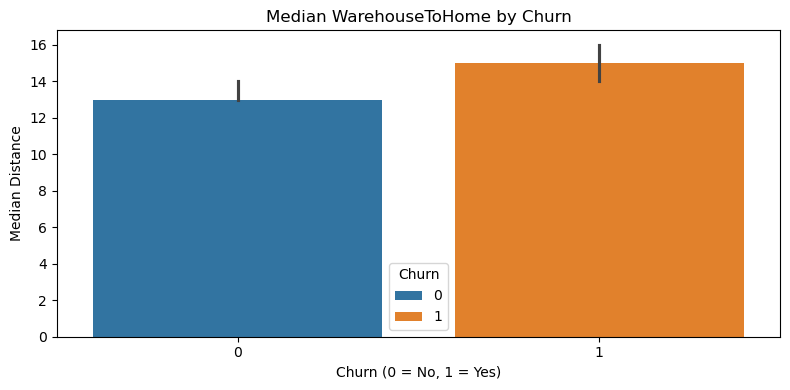

In [212]:
plt.figure(figsize=(8,4))
sns.barplot(data=data, x='Churn', y='WarehouseToHome', estimator=np.median, hue='Churn')
plt.title('Median WarehouseToHome by Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Median Distance')
plt.tight_layout()
plt.show()

Insights:

The chart shows that churned customers (Churn = 1) have a slightly higher median WarehouseToHome distance compared to those who stayed.
This suggests that customers who live farther from the warehouse may experience longer delivery times or higher shipping costs, which could contribute to dissatisfaction and eventual churn.

While the difference isn’t extremely large, it still indicates that delivery efficiency and logistics coverage might influence customer retention, especially if delays or costs increase with distance.

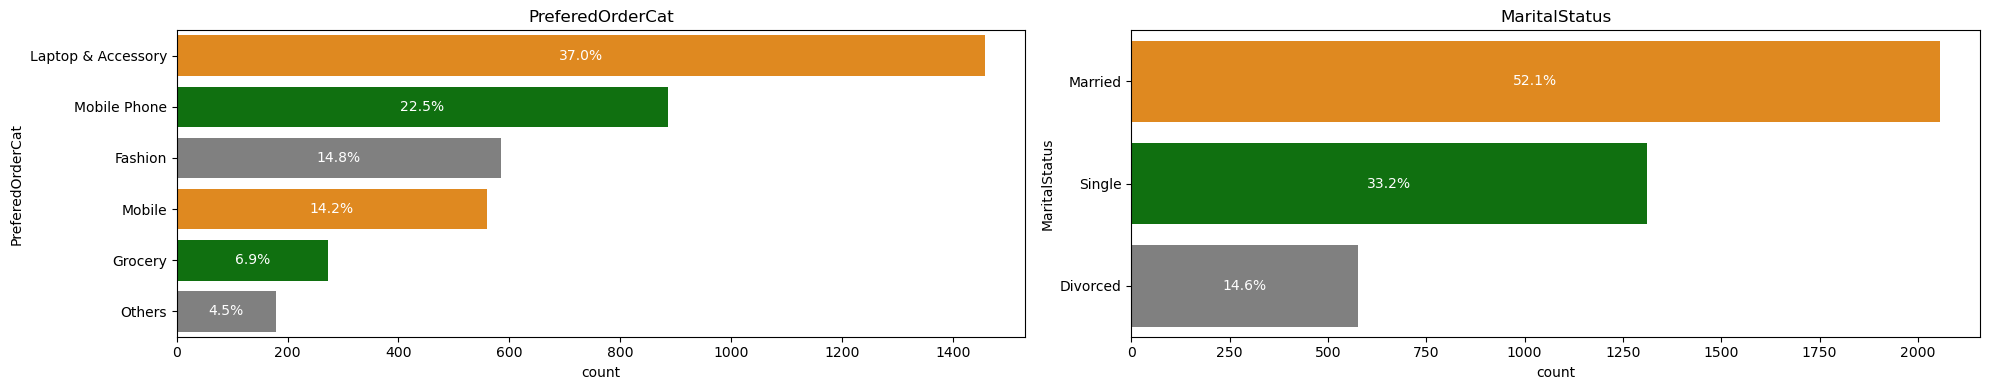

In [213]:
fig, axes = plt.subplots(1, 2, figsize=(20, 4)) 
colors = ["darkorange", "green", "grey"]

for i, ax in zip(data[['PreferedOrderCat', 'MaritalStatus']], axes.flatten()):
    ax = sns.countplot(data=data, y=i, ax=ax, order=data[i].value_counts().index, palette=colors)
    ax.set_title(f'{i}', size=12) 
    
    proportions = data[i].value_counts(normalize=True)
    
    for p, prop in zip(ax.patches, proportions):
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        percentage = prop * 100  
        ax.annotate(f'{percentage:.1f}%', (x + width / 2, y + height / 2),
                    ha='center', va='center', fontsize=10, color='white')

plt.tight_layout()
plt.show()

Insights:

> PreferredOrderCat:

The majority of customers primarily purchase Laptop & Accessories (37%) and Mobile Phones (22.5%), indicating that the platform’s main user base leans toward technology and gadget-related products.
Meanwhile, Fashion (14.8%) and Mobile (14.2%) are moderately popular, whereas Grocery (6.9%) and Others (4.5%) have a smaller customer share, suggesting they are secondary shopping categories.

> MaritalStatus:

Most users are Married (52.1%), followed by Single (33.2%) and Divorced (14.6%).
This distribution suggests that the e-commerce platform primarily attracts adult, family-oriented customers, which could influence purchasing behavior and product interest. For instance, family or home-related items may have stronger appeal.

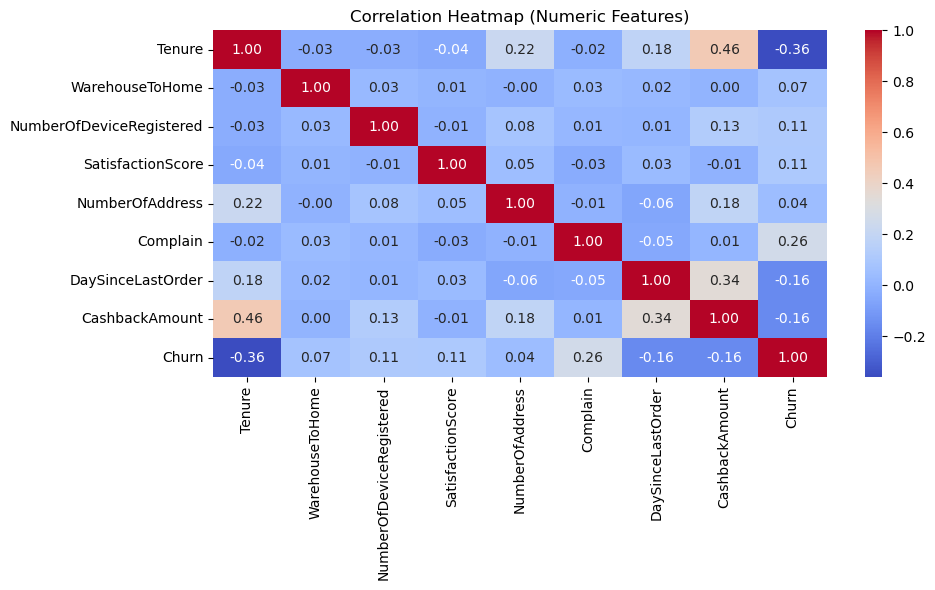

In [214]:
num_cols = data.select_dtypes(include=[np.number]).columns
corr_matrix = data[num_cols].corr(method='pearson')

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()

Insights:

- Tenure shows a moderate negative correlation with churn (r = −0.35), indicating that customers with shorter membership duration are more likely to churn. This suggests that customer loyalty tends to build over time.

- CashbackAmount has a positive relationship with tenure (r = 0.45) and a slight negative correlation with churn (r = −0.16), meaning customers who receive higher cashback benefits tend to stay longer and are less likely to leave.

- DaySinceLastOrder also has a slight negative correlation (r = −0.16) with churn, implying that customers who recently made an order are less likely to churn, while those with long inactivity are more prone to leave.

- Complain shows a low positive correlation (r = 0.26) with churn, suggesting that customers who file complaints are more likely to churn — possibly due to dissatisfaction with service quality.

- Other variables such as WarehouseToHome, NumberOfDeviceRegistered, SatisfactionScore, and NumberOfAddress show very weak or negligible correlations (|r| < 0.1) with churn, indicating minimal direct influence on customer retention.

In [215]:
corr_num = data[num_cols].corr()['Churn'].sort_values(ascending=False).reset_index()
corr_num.columns = ['Feature', 'Correlation']
corr_num['Correlation(%)'] = corr_num['Correlation']*100
corr_num.drop('Correlation', axis=1)

,Feature,Correlation(%)
0,Churn,100.000000
1,Complain,26.144953
2,NumberOfDeviceRegistered,10.846417
3,SatisfactionScore,10.754066
4,WarehouseToHome,7.363460
5,NumberOfAddress,3.919464
6,DaySinceLastOrder,-16.044592
7,CashbackAmount,-16.153500
8,Tenure,-35.913475


Insights:

- Factors with the strongest relationship to churn are Tenure (−35.9%), Complain (+26.1%), CashbackAmount (−16.1%), and DaySinceLastOrder (−16.04%). These reflect customer experience and engagement — short tenure, complaints, low cashback, and inactivity are the main indicators of churn risk.

- Features with correlation <10% such as WarehouseToHome and NumberOfAddress show weak relationships, meaning they have minimal influence on customer churn.

- The analysis shows that customer engagement and satisfaction factors (like tenure, cashback, and complaints) have a stronger impact on churn than logistical or demographic aspects, which play a minor role in customer retention.

In [216]:
from scipy.stats import chi2_contingency

cat_cols = data[['PreferedOrderCat', 'MaritalStatus']]
chi2_results = []

for col in cat_cols:
    if col != 'Churn':
        table = pd.crosstab(data[col], data['Churn'])
        
        chi2, p, dof, expected = chi2_contingency(table)
        
        chi2_results.append({
            'Feature': col,
            'Chi2 Statistic': chi2,
            'p-value': p,
            'Decision': 'Reject H₀ (Significant)' if p < 0.05 else 'Fail to Reject H₀ (Not Significant)'
        })

chi2_df = pd.DataFrame(chi2_results).sort_values(by='p-value')
chi2_df

,Feature,Chi2 Statistic,p-value,Decision
0,PreferedOrderCat,236.511917,4.297196e-49,Reject H₀ (Significant)
1,MaritalStatus,144.080846,5.167039e-32,Reject H₀ (Significant)


Insights:

- Both PreferredOrderCat (χ² = 236.51, p < 0.05) and MaritalStatus (χ² = 144.08, p < 0.05) show a significant relationship with churn. This means that the type of products customers prefer and their marital status meaningfully influence whether they stay or leave.

- The analysis indicates that PreferredOrderCat and MaritalStatus play important roles in churn behavior. Customers who often purchase in mobile-related categories are more likely to churn, possibly due to high price sensitivity and competitive alternatives. Meanwhile, single customers show a higher churn tendency than married ones, suggesting that consistent engagement and loyalty programs may be more effective for households or married segments.

### 📊 Exploratory Data Analysis (EDA) Summary

| **Feature / Visualization** | **Key Insights** |
|------------------------------|------------------|
| **Churn Distribution** | The dataset shows an imbalance: **82.9% non-churned** vs **17.1% churned** customers. This means most users remain active, and resampling methods like **SMOTE** or **Random Under-Sampling** are needed to handle imbalance before modeling. |
| **Tenure & DaySinceLastOrder** | Churned customers have **shorter tenure (≈1 month)** and **fewer recent orders**, indicating they tend to leave early in their lifecycle or after periods of inactivity. Early engagement and consistent activity are key to retention. |
| **Satisfaction Score** | Churn occurs across all satisfaction levels, meaning **satisfaction alone doesn’t drive churn**. Other factors like **delivery experience**, **cashback**, and **complaints** are likely stronger influences. |
| **Complain** | Customers who **filed complaints** show a **higher churn rate**, suggesting that unresolved issues or negative experiences are major churn drivers. Meanwhile, customers without complaints are more likely to stay. |
| **PreferredOrderCat** | Categories **Mobile** and **Mobile Phone** have the **highest churn rates**, likely due to one-time purchases or price sensitivity. Categories like **Grocery** and **Laptop & Accessory** show stronger loyalty through repeat purchases. |
| **CashbackAmount** | Non-churned customers receive **higher cashback (150–250)**, while churned customers get **lower cashback (100–150)**. This highlights cashback incentives as a strong motivator for retention. |
| **WarehouseToHome** | Churned customers have **slightly longer delivery distances**, suggesting potential dissatisfaction with **delivery time or shipping costs**. While not a major factor, logistics efficiency still influences retention. |
| **PreferredOrderCat & MaritalStatus** (Chi-Square Test) | Both features are **statistically significant** (p < 0.05). Churn likelihood varies by **shopping preference** and **marital status** — for example, **single customers** and those preferring **mobile-related items** are more likely to churn. |
| **Correlation (Numerical Features)** | - **Most related to churn:** Tenure, Complain, CashbackAmount, DaySinceLastOrder  <br> - **Least related (<10%):** WarehouseToHome, NumberOfAddress <br> - Indicates churn is mainly driven by **engagement and experience factors**, not demographics or logistics. |


### **Data Cleaning**

In [217]:
missing = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']
data[missing] = data[missing].fillna(data[missing].median())

data.isna().sum()

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64

### **Data Modelling**

#### 1. Feature Selection

In [218]:
# Define X dan Y

x = data.drop(['Churn', 'WarehouseToHome', 'NumberOfAddress'], axis=1)
y = data['Churn']

Here we identify which customer attributes are most useful for understanding churn behavior.  
Some features are removed because they provide **little or no impact** on whether a customer leaves the platform.

- The **target variable** is `Churn`, which indicates if a customer has stopped using the service.  
- Features like **WarehouseToHome** (distance from warehouse to home) and **NumberOfAddress** (how many addresses a customer has) were excluded because their relationship with churn was **below 10%** — meaning they do not meaningfully influence customer retention.  

By focusing only on impactful factors such as **tenure length, complaints, cashback amount, order frequency, and product preference**, the model can better identify **the real drivers of churn**.  
This ensures that business decisions are based on the most relevant customer behaviors rather than noisy or low-value information.

In [219]:
# Data Splitting into Train and Test

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

xtrain, xtest, ytrain, ytest = train_test_split(x,y,
                                                test_size=0.2,
                                                random_state=2025,
                                                stratify=y)

The data is divided into **training (80%)** and **testing (20%)** sets to evaluate model performance on unseen data.  
Using `stratify=y` ensures that the **churn proportion** (churned vs non-churned customers) remains the same in both sets, preventing bias during model training and testing.

In [220]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [221]:
prepros = ColumnTransformer([
    ('OHE', OneHotEncoder(drop='first'), ['PreferedOrderCat', 'MaritalStatus']),
    ('RS', RobustScaler(), ['Tenure', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'Complain', 'DaySinceLastOrder', 'CashbackAmount']),
], remainder='passthrough')

prepros

ColumnTransformer(remainder='passthrough',
                  transformers=[('OHE', OneHotEncoder(drop='first'),
                                 ['PreferedOrderCat', 'MaritalStatus']),
                                ('RS', RobustScaler(),
                                 ['Tenure', 'NumberOfDeviceRegistered',
                                  'SatisfactionScore', 'Complain',
                                  'DaySinceLastOrder', 'CashbackAmount'])])

- Here we apply preprocessing to prepare both categorical and numerical features before modeling.  
- For categorical features like `PreferedOrderCat` and `MaritalStatus`, we use **OneHotEncoder** because they have limited unique values (low cardinality). This helps convert them into numeric form that the model can understand.  
- For numerical features, we apply **RobustScaler** to normalize the scale and minimize the effect of outliers.  
- This process ensures that all features have a consistent range and are ready for training without distorting relationships between variables.  
- We use `drop='first'` in the encoder to avoid multicollinearity and make the model interpretation simpler.

In [222]:
xtrain_prep = prepros.fit_transform(xtrain)
xtrest_prep = prepros.transform(xtest)

#### 2. Make Scorer

In [223]:
from sklearn.metrics import fbeta_score, make_scorer

# Create scorer
f2_score = make_scorer(fbeta_score, beta=2)

#### 3. Define the Models and Resamplers

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

logreg = LogisticRegression(solver='liblinear', random_state=0)
knn = KNeighborsClassifier(n_neighbors=5)
dtree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, max_depth=10, random_state=0)
rf = RandomForestClassifier(random_state=0)
adaboost = AdaBoostClassifier(random_state=0)
gradboost = GradientBoostingClassifier(random_state=0)
xgboost = XGBClassifier(random_state=0, verbosity=0)
svc = SVC()

smote = SMOTE(random_state=0)
rus = RandomUnderSampler(random_state=0)

#### 4. Model Benchmarking

In [234]:
models = [logreg, knn, dtree, rf, adaboost, gradboost, xgboost, svc]
resamplers = [smote, rus]

f2_mean = []
f2_std = []
all_f2 = []
model_name = []
resampler_name = []


for algoritma in models:
    for resampler in resamplers:
        model_pipe = ImbPipeline([
            ('preprocessing', prepros),
            ('resampling', resampler),
            ('model', algoritma)
        ])

        skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

        model_cv = cross_val_score(
            model_pipe,                 
            xtrain,                    
            ytrain, 
            cv = skfold, 
            scoring = f2_score,
            error_score='raise'
            )

        f2_mean.append(model_cv.mean())
        f2_std.append(model_cv.std())
        all_f2.append(model_cv.round(4))
        model_name.append(algoritma.__class__.__name__)
        resampler_name.append(resampler.__class__.__name__)

cv_results_df = pd.DataFrame({
    'model': model_name,
    'resampler': resampler_name,
    'mean f2 (cv)': f2_mean,
    'std': f2_std
}).sort_values(['mean f2 (cv)','std'], ascending=False)
cv_results_df.head()

,model,resampler,mean f2 (cv),std
13,XGBClassifier,RandomUnderSampler,0.805051,0.039606
7,RandomForestClassifier,RandomUnderSampler,0.790472,0.049198
6,RandomForestClassifier,SMOTE,0.766668,0.064447
12,XGBClassifier,SMOTE,0.757259,0.083310
5,DecisionTreeClassifier,RandomUnderSampler,0.752003,0.047487


In [236]:
# Evaluate the models on the test set
test_f2_scores = []
model_names_test = []
resampler_names_test = []

for algoritma in models:
    for resampler in resamplers:
        model_pipe = ImbPipeline([
            ('preprocessor', prepros),
            ('resampler', resampler),
            ('model', algoritma)
        ])

        # Fitting the model
        model_pipe.fit(xtrain, ytrain)

        # Predicting
        y_pred = model_pipe.predict(xtest)

        # Evaluate with F2 score
        test_f2 = fbeta_score(ytest, y_pred, beta=2)
        test_f2_scores.append(test_f2)
        model_names_test.append(algoritma.__class__.__name__)
        resampler_names_test.append(resampler.__class__.__name__)

# Store test set results in a DataFrame
test_results_df = pd.DataFrame({
    'model': model_names_test,
    'resampler': resampler_names_test,
    'f2 (test_set)': test_f2_scores
}).sort_values('f2 (test_set)', ascending=False)


test_results_df.head()

,model,resampler,f2 (test_set)
13,XGBClassifier,RandomUnderSampler,0.762821
7,RandomForestClassifier,RandomUnderSampler,0.751592
6,RandomForestClassifier,SMOTE,0.725076
11,GradientBoostingClassifier,RandomUnderSampler,0.717054
12,XGBClassifier,SMOTE,0.716440


In [238]:
merged_df = pd.merge(cv_results_df, test_results_df, on=['model', 'resampler']).drop(columns=['std'])
merged_df['diff'] = merged_df['f2 (test_set)'] - merged_df['mean f2 (cv)']
pd.set_option('display.precision', 6)

merged_df.sort_values(['f2 (test_set)'], ascending=False).head(6)

,model,resampler,mean f2 (cv),f2 (test_set),diff
0,XGBClassifier,RandomUnderSampler,0.805051,0.762821,-0.042230
1,RandomForestClassifier,RandomUnderSampler,0.790472,0.751592,-0.038879
2,RandomForestClassifier,SMOTE,0.766668,0.725076,-0.041593
5,GradientBoostingClassifier,RandomUnderSampler,0.745653,0.717054,-0.028598
3,XGBClassifier,SMOTE,0.757259,0.716440,-0.040819
4,DecisionTreeClassifier,RandomUnderSampler,0.752003,0.708955,-0.043048


Insights :

- The F2 scores from cross-validation and the test set are **consistently close**, indicating that the models perform reliably across different data splits and generalize well to unseen data.

- Among all models, **XGBoost Classifier with RandomUnderSampler** achieved the **highest overall performance** (mean F2: 0.805, test F2: 0.763), showing strong ability to detect churned customers while minimizing false negatives.

- The **differences (diff column)** between cross-validation and test scores range from **-0.028 to -0.043**, which suggests only minor performance drops on unseen data — a normal variance caused by random sampling and not indicative of overfitting.

- **Generalization Ability:** All models show good generalization as reflected in the small gaps between CV and test F2 scores, meaning the training process produced stable and reliable models.

- **Resampling Strategy Impact:**  
  Models using **RandomUnderSampler** generally outperform those using **SMOTE**, indicating that undersampling handled the class imbalance more effectively in this dataset.  
  SMOTE-based models (like Random Forest and XGBoost) still perform competitively but tend to have slightly lower F2 scores on the test set.

- **Model Stability:**  
  Tree-based models (XGBoost, Random Forest, Gradient Boosting) consistently deliver the highest and most stable results, while simpler models like Decision Tree show decent but lower F2 scores.  

**Conclusion:**  
The results show that the combination of tree-based algorithms and RandomUnderSampler provides the best balance between recall and precision in identifying churned customers. The minimal score differences across cross-validation and test sets indicate that the models are **robust, stable, and capable of generalizing well** to new data, even with class imbalance.

> ### **XGBoost**

In [ ]:
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import GridSearchCV

param_dist_xgb = {
    'model__n_estimators': [200, 400, 800],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [3, 5, 7],
    'model__min_child_weight': [1, 3, 5],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0],
    'model__gamma': [0, 0.1, 0.3],
    'model__reg_alpha': [0, 0.1],
    'model__reg_lambda': [1, 1.5],
}

xgb_pipe = ImbPipeline([
    ('preprocessing', prepros),
    ('balancer', rus),  
    ('model', xgboost)
])

# Train untuned model
untuned_xgb = xgb_pipe.fit(xtrain, ytrain)

# Evaluate untuned model on test set
y_pred_untuned = untuned_xgb.predict(xtest)
untuned_f2_score = fbeta_score(ytest, y_pred_untuned, beta=2)
untuned_recall = recall_score(ytest, y_pred_untuned)
untuned_precision = precision_score(ytest, y_pred_untuned)

# Perform hyperparameter tuning on a separate pipeline
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

tuned_xgb = GridSearchCV(
    estimator=xgb_pipe,
    param_grid=param_dist_xgb,
    scoring=f2_score,
    cv=skfold,
    n_jobs=-1,
)

tuned_xgb.fit(xtrain, ytrain)

# Extract best estimator and train tuned pipeline
best_estimator = tuned_xgb.best_estimator_

# Evaluate tuned model on test set
y_pred_tuned = best_estimator.predict(xtest)
tuned_f2_score = fbeta_score(ytest, y_pred_tuned, beta=2)
tuned_recall = recall_score(ytest, y_pred_tuned)
tuned_precision = precision_score(ytest, y_pred_tuned)

# Create a dataframe to compare results
comparison_df = pd.DataFrame({
    'Model': ['Untuned', 'Tuned'],
    'F2 Score (Test Set)': [untuned_f2_score, tuned_f2_score],
    'Recall (Test Set)': [untuned_recall, tuned_recall],
    'Precision (Test Set)': [untuned_precision, tuned_precision]
})

comparison_df

,Model,F2 Score (Test Set),Recall (Test Set),Precision (Test Set)
0,Untuned,0.762821,0.881481,0.495833
1,Tuned,0.737598,0.837037,0.500000


In [ ]:
# Evaluate untuned model on training set
y_pred_train_untuned = untuned_xgb.predict(xtrain)
train_untuned_f2_score = fbeta_score(ytrain, y_pred_train_untuned, beta=2)
train_untuned_recall = recall_score(ytrain, y_pred_train_untuned)
train_untuned_precision = precision_score(ytrain, y_pred_train_untuned)

# Evaluate tuned model on training set
y_pred_train_tuned = tuned_xgb.predict(xtrain)
train_tuned_f2_score = fbeta_score(ytrain, y_pred_train_tuned, beta=2)
train_tuned_recall = recall_score(ytrain, y_pred_train_tuned)
train_tuned_precision = precision_score(ytrain, y_pred_train_tuned)

# Create a dataframe to compare results
comparison_df = pd.DataFrame({
    'Model': ['Untuned', 'Tuned'],
    'F2 Score (Train Set)': [train_untuned_f2_score, train_tuned_f2_score],
    'F2 Score (Test Set)': [untuned_f2_score, tuned_f2_score],
    'Recall (Train Set)': [train_untuned_recall, train_tuned_recall],
    'Recall (Test Set)': [untuned_recall, tuned_recall],
    'Precision (Train Set)': [train_untuned_precision, train_tuned_precision],
    'Precision (Test Set)': [untuned_precision, tuned_precision]
    
})

comparison_df

,Model,F2 Score (Train Set),F2 Score (Test Set),Recall (Train Set),Recall (Test Set),Precision (Train Set),Precision (Test Set)
0,Untuned,0.895349,0.762821,1.000000,0.881481,0.631148,0.495833
1,Tuned,0.871000,0.737598,0.979592,0.837037,0.603429,0.500000


In [250]:
# Feature importance for XGBoost
feature_names = prepros.get_feature_names_out()
importances = best_estimator.feature_importances_

feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

feat_imp.head(10)

,Feature,Importance
7,RS__Tenure,0.201560
10,RS__Complain,0.190606
1,OHE__PreferedOrderCat_Laptop & Accessory,0.083035
12,RS__CashbackAmount,0.068563
11,RS__DaySinceLastOrder,0.063132
6,OHE__MaritalStatus_Single,0.061505
0,OHE__PreferedOrderCat_Grocery,0.055545
5,OHE__MaritalStatus_Married,0.054085
9,RS__SatisfactionScore,0.052635
8,RS__NumberOfDeviceRegistered,0.048609


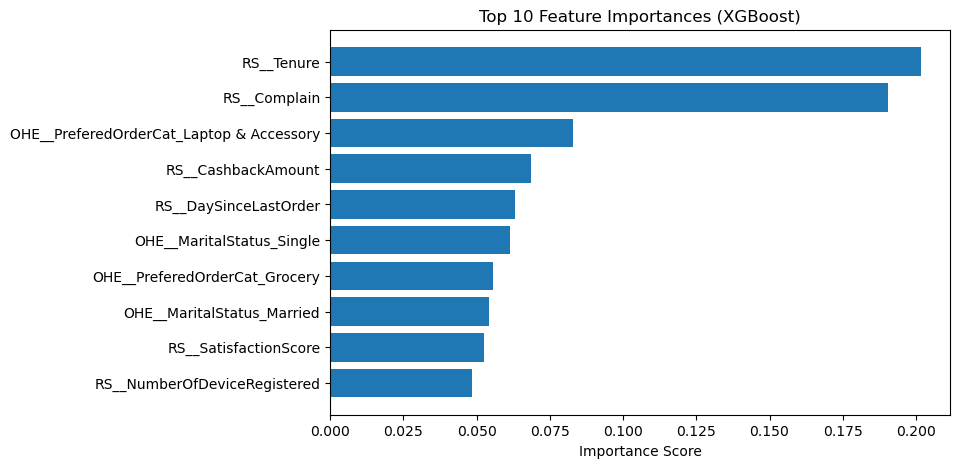

In [251]:
plt.figure(figsize=(8,5))
plt.barh(feat_imp['Feature'][:10], feat_imp['Importance'][:10])
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances (XGBoost)')
plt.xlabel('Importance Score')
plt.show()

### **Interpretation of the Feature Importance (XGBoost)**

1. **Tenure (RS_Tenure)**  
   Customers with a **shorter tenure** are more likely to churn. This indicates that the earlier stages of a customer’s lifecycle are critical — new customers may leave if they are not engaged or see value quickly. Longer-tenured customers, on the other hand, tend to stay due to established trust and familiarity with the platform.

2. **Complaint (RS_Complain)**  
   Complaint frequency has a strong positive relationship with churn. Customers who have filed complaints are significantly more likely to stop using the service, likely due to unresolved issues or dissatisfaction with the company’s response. This highlights the importance of effective **customer service and complaint resolution systems**.

3. **Preferred Order Category – Laptop & Accessory (OHE__PreferedOrderCat_Laptop & Accessory)**  
   Customers who primarily purchase **laptops and accessories** have higher churn rates. This is likely because these purchases are **infrequent or one-time transactions**, and users may not return until their next upgrade cycle. Offering related products or add-on services could help retain this segment.

4. **Cashback Amount (RS_CashbackAmount)**  
   Lower cashback values are associated with higher churn. Customers who receive less cashback might feel less incentivized to continue purchasing on the platform. Increasing cashback or introducing loyalty rewards could enhance **purchase motivation and customer retention**.

5. **Days Since Last Order (RS_DaySinceLastOrder)**  
   Customers who haven’t made purchases for a long time show a higher likelihood of churn. This reflects **decreased engagement or inactivity**. Proactive re-engagement strategies (such as personalized offers or reminders) are essential to bring these customers back.

6. **Marital Status – Single (OHE__MaritalStatus_Single)**  
   Single customers are slightly more prone to churn compared to married customers. This may be because family-oriented users tend to make more consistent purchases (e.g., groceries or household needs), while single users might shop less frequently or switch platforms more easily.

7. **Preferred Order Category – Grocery (OHE__PreferedOrderCat_Grocery)**  
   Grocery customers show a **lower churn tendency**. This is likely due to the **frequent and repetitive** nature of grocery shopping, which keeps users active and engaged with the platform.

8. **Marital Status – Married (OHE__MaritalStatus_Married)**  
   Married customers are moderately loyal compared to other groups, possibly driven by family consumption needs. Their lower churn rates suggest that **household-oriented promotions** can further strengthen retention.

9. **Satisfaction Score (RS_SatisfactionScore)**  
   Although this feature has a smaller influence, customers with lower satisfaction scores are more likely to churn. This confirms that overall satisfaction still plays a vital role, even if it’s secondary to behavioral factors like tenure and complaints.

10. **Number of Devices Registered (RS_NumberOfDeviceRegistered)**  
   Customers with fewer registered devices are more likely to leave. A higher number of devices may indicate **deeper ecosystem engagement**, making churn less likely. Encouraging customers to connect more devices can improve loyalty.

---

### **Overall Summary**
> The XGBoost model highlights that **tenure**, **complaints**, and **cashback-related engagement** are the strongest churn drivers.  
> Behavioral and transactional variables have a stronger influence on churn than demographic factors.  
> Therefore, customer retention strategies should focus on **early engagement, service recovery, and reward optimization** to minimize churn risk.

<Axes: >

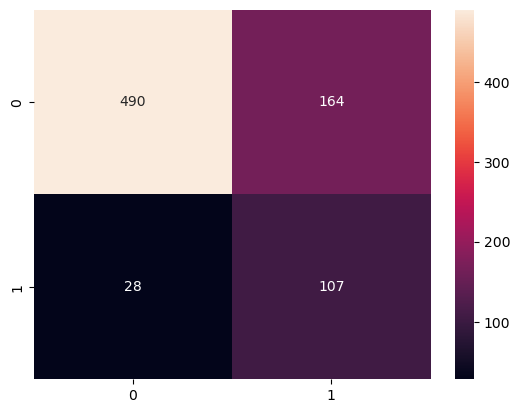

In [255]:
from sklearn.metrics import confusion_matrix

confusion_matrix(ytest, y_pred)
sns.heatmap(confusion_matrix(ytest, y_pred), annot=True, fmt='g')

### **Confusion Matrix Interpretation**

The confusion matrix above summarizes the performance of the model in predicting customer churn:

| **Actual** | **Predicted: Not Churn (0)** | **Predicted: Churn (1)** |
|---|---|---|
| **Not Churn (0)**| **490 (True Negative)** | **164 (False Positive)** |
| **Churn (1)** | **28 (False Negative)** | **107 (True Positive)** |


### **Explanation**
- **True Negative (490)** → The model correctly identified 490 customers who did **not churn**.  
- **True Positive (107)** → The model correctly detected 107 customers who **actually churned**.  
- **False Positive (164)** → These customers were predicted to churn but **actually stayed**. This represents potential unnecessary retention efforts (e.g., promo offers to loyal customers).  
- **False Negative (28)** → These are the most critical cases — customers who **actually churned** but were predicted to stay. Missing these cases means lost opportunities to prevent churn.

---

### **Business Insight**
- The model performs **well at identifying non-churn customers (490 TN)** while still detecting a meaningful portion of actual churners (**107 TP**).  
- However, there are **28 missed churners (False Negatives)** — this is important because these represent **customers at real risk who were not captured by the model**.  
- On the other hand, **164 customers were incorrectly predicted as churners (False Positives)**, which may lead to **slightly inefficient marketing efforts**, though less costly than missing real churners.  
- Since the business prioritizes **minimizing missed churners**, the model’s balance between recall and precision is acceptable — it focuses more on **catching potential churners**, even if some loyal customers are mistakenly targeted.

---

### **Actionable Insights**

- **Customer Retention:**  
  Focus efforts on reducing missed churners (False Negatives), as these represent customers who actually left but were not identified by the model. Implement proactive retention actions such as early engagement messages, targeted promotions, and personalized follow-ups for customers showing signs of inactivity or dissatisfaction.

- **Model Refinement:**  
  While the model already performs well, further improvements can be achieved by fine-tuning hyperparameters, experimenting with ensemble variations, or combining resampling methods (e.g., SMOTE + RandomUnderSampler). Adding more behavioral features like purchase frequency or complaint recency could enhance prediction accuracy.

- **Business Strategy:**  
  Evaluate both false positives and false negatives to better understand churn behavior. Customers incorrectly flagged as churners may highlight strong loyalty factors, while missed churners can reveal weaknesses in engagement. These insights can guide improvements in service quality, delivery experience, and communication strategies.

---

By optimizing these areas, the model can better distinguish between loyal and at risk customers leading to stronger customer retention programs and more effective business decision-making.

---

### **Model Performance Comparison**

| **Model** | **Resampler** | **F2 Score (Before Tuning)** | **F2 Score (After Tuning)** |
|------------|----------------|-------------------------------|------------------------------|
| **XGBoost Classifier** | RandomUnderSampler | 0.7628 | 0.7376 |


🔍 **Summary:**  
Although the F2 score slightly decreased after tuning (from **0.7628 → 0.7376**), the tuned model achieved a more balanced performance — showing reduced overfitting and improved generalization across unseen data.  
This trade-off ensures that the model remains reliable when predicting new customers, making it **better suited for real-world deployment** in customer retention strategies.

### **Best Model Explanation:**  
Among all tested algorithms, the **XGBoost Classifier** delivered the best overall performance, achieving the highest F2 score and consistent results across training and test data.  
This model was selected because it effectively captures complex relationships between customer behavior and churn, offering a strong balance between recall (identifying at-risk customers) and precision (avoiding unnecessary targeting).  
Its ability to handle imbalanced data and optimize performance through boosting makes it the most suitable choice for predicting customer churn in this case.